In [5]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight

import matplotlib.pyplot as plt

from xgboost import XGBClassifier

import lightgbm as lgb

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#from imblearn.over_sampling import RandomOverSampler, SMOTE 

# Necessary to get names out
SimpleImputer.get_feature_names_out = (lambda self, names=None:
                                       self.feature_names_in_)

In [6]:
features_num = [
    "RA", "DEC", "E_RA", "E_DEC", "Total_flux", "E_Total_flux", "Peak_flux", 
    "E_Peak_flux", "Maj", "Min", "PA", "E_Maj", "E_Min", "E_PA", "DC_Maj", 
    "DC_Min", "DC_PA", "Isl_rms", "lr_fin", "ALPHA_J2000", "DELTA_J2000", "EBV", 
    "NUV_flux_corr", "NUV_fluxerr_corr", "NUV_mag_corr", "NUV_magerr_corr", 
    "u_flux_corr", "u_fluxerr_corr", "u_mag_corr", "u_magerr_corr", 
    "Bw_flux_corr", "Bw_fluxerr_corr", "Bw_mag_corr", "Bw_magerr_corr", 
    "R_flux_corr", "R_fluxerr_corr", "R_mag_corr", "R_magerr_corr", "I_flux_corr", 
    "I_fluxerr_corr", "I_mag_corr", "I_magerr_corr", "z_flux_corr", "z_fluxerr_corr", 
    "z_mag_corr", "z_magerr_corr", "z_Subaru_flux_corr", "z_Subaru_fluxerr_corr", "z_Subaru_mag_corr", 
    "z_Subaru_magerr_corr", "y_flux_corr", "y_fluxerr_corr", "y_mag_corr", 
    "y_magerr_corr", "J_flux_corr", "J_fluxerr_corr", "J_mag_corr", 
    "J_magerr_corr", "H_flux_corr", "H_mag_corr", "H_magerr_corr", 
    "K_flux_corr", "K_fluxerr_corr", "K_mag_corr", "K_magerr_corr",  
    "Ks_fluxerr_corr", "Ks_mag_corr", "Ks_magerr_corr", "ch1_flux_corr",  
    "ch1_fluxerr_corr", "ch1_mag_corr", "ch1_magerr_corr", "ch2_flux_corr", 
    "ch2_fluxerr_corr", "ch2_mag_corr", "ch3_flux_corr", "ch3_fluxerr_corr", 
    "ch3_mag_corr", "ch3_magerr_corr",  "ch4_flux_corr", "ch4_fluxerr_corr",  
    "ch4_magerr_corr",  "Separation", "CLASS_STAR",  
    "F_MIPS_24", "FErr_MIPS_24_u",  "FErr_MIPS_24_l", "Bkg_MIPS_24",  
    "Sig_conf_MIPS_24", "Rhat_MIPS_24", "n_eff_MIPS_24", "Pval_res_24",  
    "F_PACS_100", "FErr_PACS_100_u", "FErr_PACS_100_l", "F_PACS_160",  
    "FErr_PACS_160_u", "FErr_PACS_160_l", "Bkg_PACS_100", "Bkg_PACS_160",  
    "Sig_conf_PACS_100", "Sig_conf_PACS_160", "Rhat_PACS_100", "Rhat_PACS_160",  
    "n_eff_PACS_100",  "n_eff_PACS_160",  "Pval_res_100",  "Pval_res_160",  
    "F_SPIRE_250",  "FErr_SPIRE_250_u",  "FErr_SPIRE_250_l", "F_SPIRE_350", 
    "FErr_SPIRE_350_u", "FErr_SPIRE_350_l", "F_SPIRE_500", "FErr_SPIRE_500_u", 
    "FErr_SPIRE_500_l", "Bkg_SPIRE_250", "Bkg_SPIRE_350", "Bkg_SPIRE_500", 
    "Sig_conf_SPIRE_250", "Sig_conf_SPIRE_350", "Sig_conf_SPIRE_500", 
    "Rhat_SPIRE_250", "Rhat_SPIRE_350", "Rhat_SPIRE_500", "n_eff_SPIRE_250", 
    "n_eff_SPIRE_500", "n_eff_SPIRE_350", "Pval_res_250", "Pval_res_350", 
    "Pval_res_500", "Z_BEST", "Z_BEST_SOURCE", "Z_SPEC", "Z_SOURCE", 
    "Z_QUAL", "RA_ZSPEC", "DEC_ZSPEC", "REL", "z1_median", "z1_min", 
    "z1_max", "z1_area", "z2_median", "z2_min", "z2_max", "z2_area", 
    "nfilt_eazy", "nfilt_atlas", "nfilt_ananna", "chi_r_best", 
    "chi_r_stellar", "zmodel", "chi_best", "Mass_median", 
    "Mass_l68", "Mass_u68", "Nfilts", "u_rest", "Bw_rest", "R_rest", 
    "I_rest", "z_rest", "z_Subaru_rest", "y_rest", "J_rest", "H_rest", 
    "K_rest", "Ks_rest", "ch1_rest", "ch2_rest", "ch3_rest", "ch4_rest", 
    "XrayFlux_0.5-2", "XrayHardness", 'FUV_flux_corr', 'FUV_fluxerr_corr', 
    'FUV_mag_corr', 'FUV_magerr_corr', 'H_fluxerr_corr', 'Ks_flux_corr', 
    'ch2_magerr_corr', 'ch4_mag_corr'

]

not_sure_columns = [
    "AGN", "optAGN", "IRAGN", "AGN_ZSPEC", "XrayAGN", "ap_to_model_z_Subaru", 
    "ap_to_model_err_z_Subaru", "ap_to_model_z", "ap_to_model_err_z", 
]

not_using_columns = [
    "AGN_final", "RadioAGN_final", "FLAG_OVERLAP_RADIO", "NoID", "optRA", "optDec", "LGZ_Size", "LGZ_Width",
    'Source_Name', 'NoID', 'optRA', 'optDec', 'LGZ_Size', 'LGZ_Width', 'LGZ_PA', 
    'Assoc', 'Assoc_Qual', 'Art_prob', 'Blend_prob', 'Hostbroken_prob', 'Imagemissing_prob', 
    'Zoom_prob', 'FLAG_DEEP', 'ID_OPTICAL', 'ID_SPITZER', 'ID', 
    'help_id', 'RA_HELP', 'DEC_HELP', 'OBJID'
]
    

features_cat_binary = [
    "flag_mips_24", "flag_PACS_100", "flag_PACS_160", "flag_spire_250", 
    "flag_spire_350", "flag_spire_500", "XID+_rerun_mips", "XID+_rerun_pacs", 
    "XID+_rerun_SPIRE", "Position_from", "FLAG_OVERLAP"
]
features_cat_non_binary = [
   "S_Code", "FLAG_WORKFLOW", "Prefilter", "Created", "flag_clean_radio", "flag_clean", "stellar_type"
]
y_column = "Classification"

classes = ['jet-mode radio AGN/low-excitation radio galaxy', 'quasar-like radio AGN / high-excitation radio galaxy', 
           'radio-quiet AGN', 'star-forming galaxy']

In [7]:
data = pd.read_csv("../../../Data/Fangyou_data/Cleaned/Complete_Bootes_clean.csv")

<AxesSubplot:>

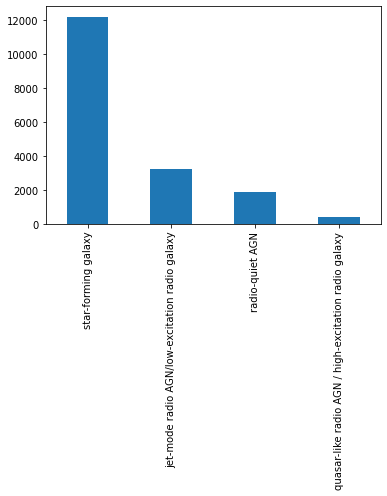

In [8]:
# Changing infinities into nan's
data = data.replace([np.inf,-np.inf], np.nan)
data['Classification'].value_counts().plot(kind='bar')

In [290]:
clean_data = data.dropna(thresh=15000, axis=1)

In [291]:
clean_data.shape

(17729, 168)

In [292]:
clean_data.to_csv("clean_data.csv")

In [234]:
class_counts = data['Classification'].value_counts()
class_counts/sum(class_counts)

star-forming galaxy                                     0.688871
jet-mode radio AGN/low-excitation radio galaxy          0.181567
radio-quiet AGN                                         0.107507
quasar-like radio AGN / high-excitation radio galaxy    0.022054
Name: Classification, dtype: float64

In [9]:
# Creating the pipeline
transformer_num = make_pipeline(
    SimpleImputer(strategy="mean"),  # there are a few missing values
    StandardScaler(),
)
# Almost all cat features are already binary, so don't have to be one-hot encoded
transformer_cat_binary = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
)
transformer_cat_non_binary = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat_binary, features_cat_binary),
    (transformer_cat_non_binary, features_cat_non_binary),
)

In [10]:
# Dropping required columns
X = data
y = data[y_column]

In [11]:
# Manually ordinally encoding, since we cannot use get_features_names out else
X[features_cat_binary] = OrdinalEncoder().fit_transform(X[features_cat_binary])

In [12]:
# Transforming y to labels
le = preprocessing.LabelEncoder()
labels = np.unique(y)
y = le.fit_transform(y)

# Creating training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [13]:
# Transforming the data, data that isn't in any of the pipelines is dropped automatically
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [14]:
# Class weights
class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_all = [class_weight[i] for i in y_train]

In [161]:
# Features in the order the preprocessor handles them
all_features = []
for feature in preprocessor.get_feature_names_out():
    all_features.append(feature.split("__")[1])
all_features = np.array(all_features, dtype=object)

In [160]:
preprocessor.get_feature_names_out().dtype

dtype('O')

# Random forest

In [138]:
clf = RandomForestClassifier(n_estimators=100, class_weight="balanced")
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [139]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.8555    0.6143    0.7151       617
quasar-like radio AGN / high-excitation radio galaxy     0.7333    0.1358    0.2292        81
                                     radio-quiet AGN     0.7872    0.4793    0.5958       386
                                 star-forming galaxy     0.8360    0.9687    0.8975      2462

                                            accuracy                         0.8347      3546
                                           macro avg     0.8030    0.5495    0.6094      3546
                                        weighted avg     0.8317    0.8347    0.8176      3546



[]

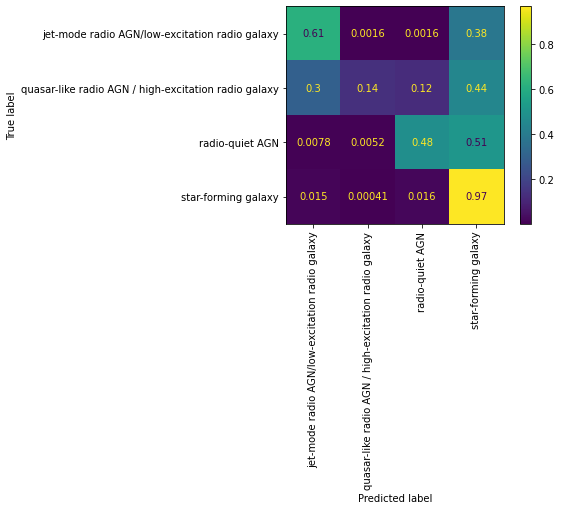

In [140]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()

In [162]:
random_forest_feature_importance = pd.DataFrame(
    np.array([all_features, clf.feature_importances_]).T,
                                               columns=['Feature', 'Importance'])
random_forest_feature_importance = random_forest_feature_importance.sort_values(by=['Importance'], ascending=False)

[]

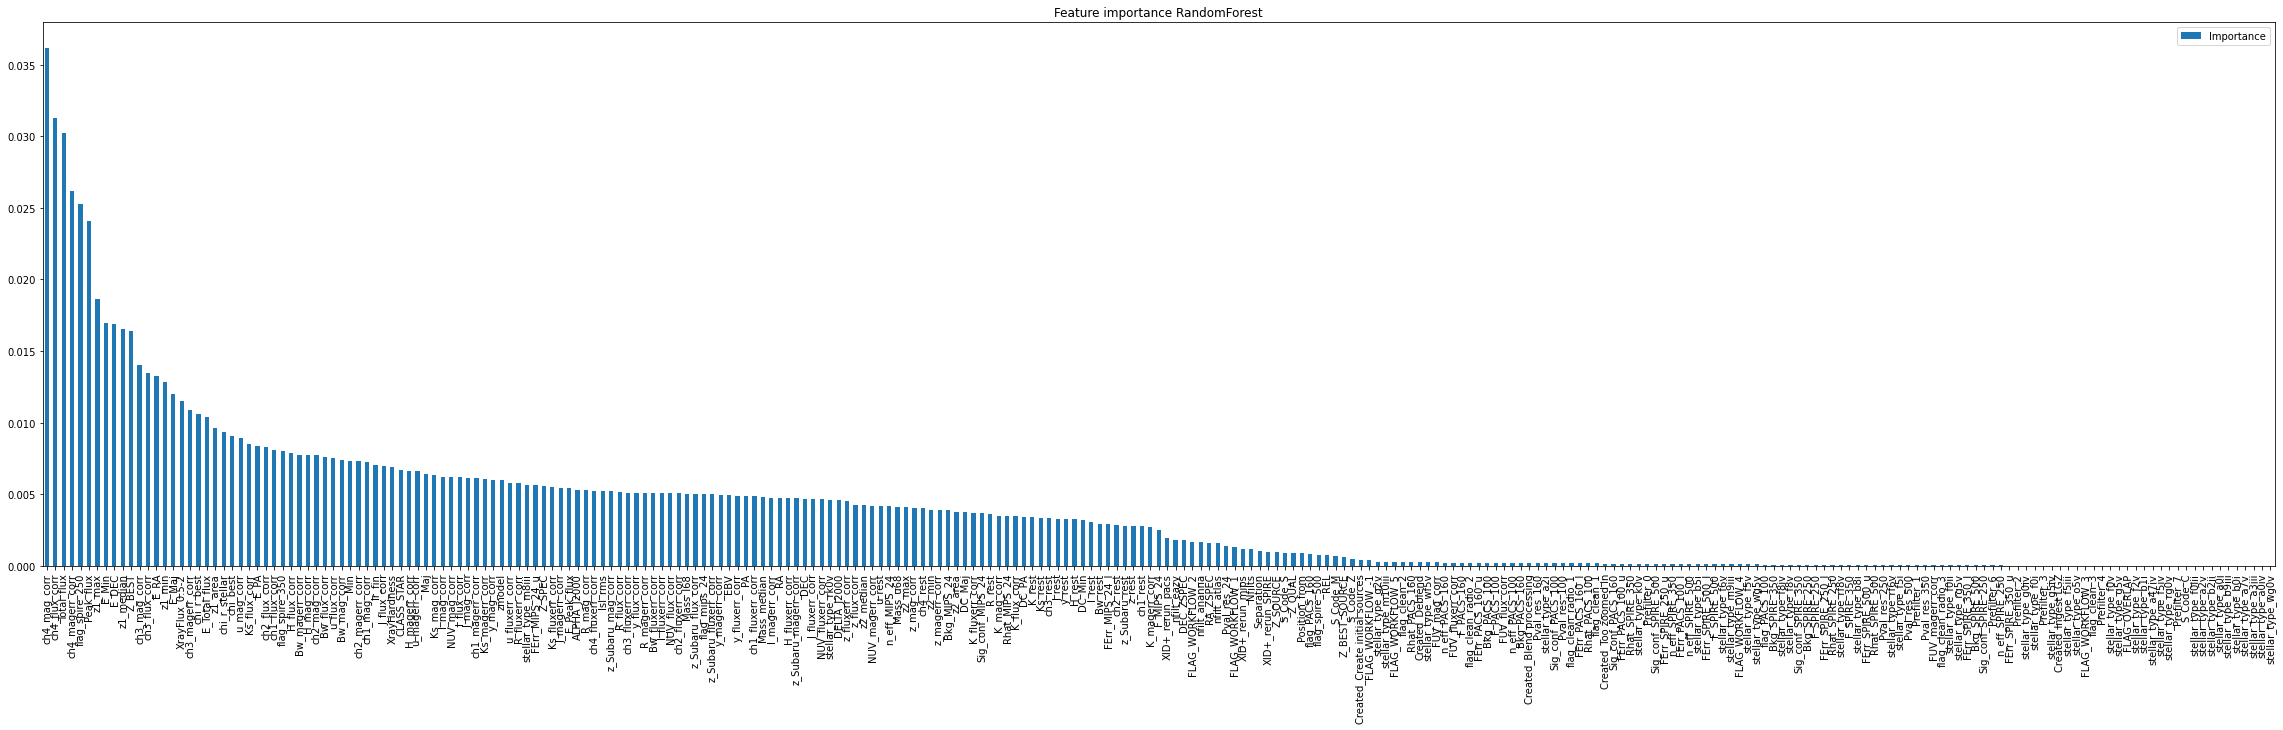

In [164]:
ax = random_forest_feature_importance.plot(kind='bar', figsize=(40,10))
ax.set_xticklabels(random_forest_feature_importance.Feature)
plt.title("Feature importance RandomForest")
plt.plot()

In [165]:
random_forest_feature_importance["Cumulative"] = np.cumsum(random_forest_feature_importance["Importance"])
random_forest_feature_importance

,Feature,Importance,Cumulative
183,ch4_mag_corr,0.036146,0.036146
79,ch4_flux_corr,0.031256,0.067402
4,Total_flux,0.030239,0.097641
81,ch4_magerr_corr,0.02615,0.123791
187,flag_spire_250,0.025265,0.149056
...,...,...,...
230,stellar_type_b0i,0.0,1.0
229,stellar_type_a7v,0.0,1.0
227,stellar_type_a3iii,0.0,1.0
224,stellar_type_a0iv,0.0,1.0


In [166]:
random_forest_feature_importance.iloc[0:150,2]

183    0.036146
79     0.067402
4      0.097641
81     0.123791
187    0.149056
         ...   
192    0.981083
135    0.982046
197    0.982953
136    0.983833
193    0.984706
Name: Cumulative, Length: 150, dtype: object

[]

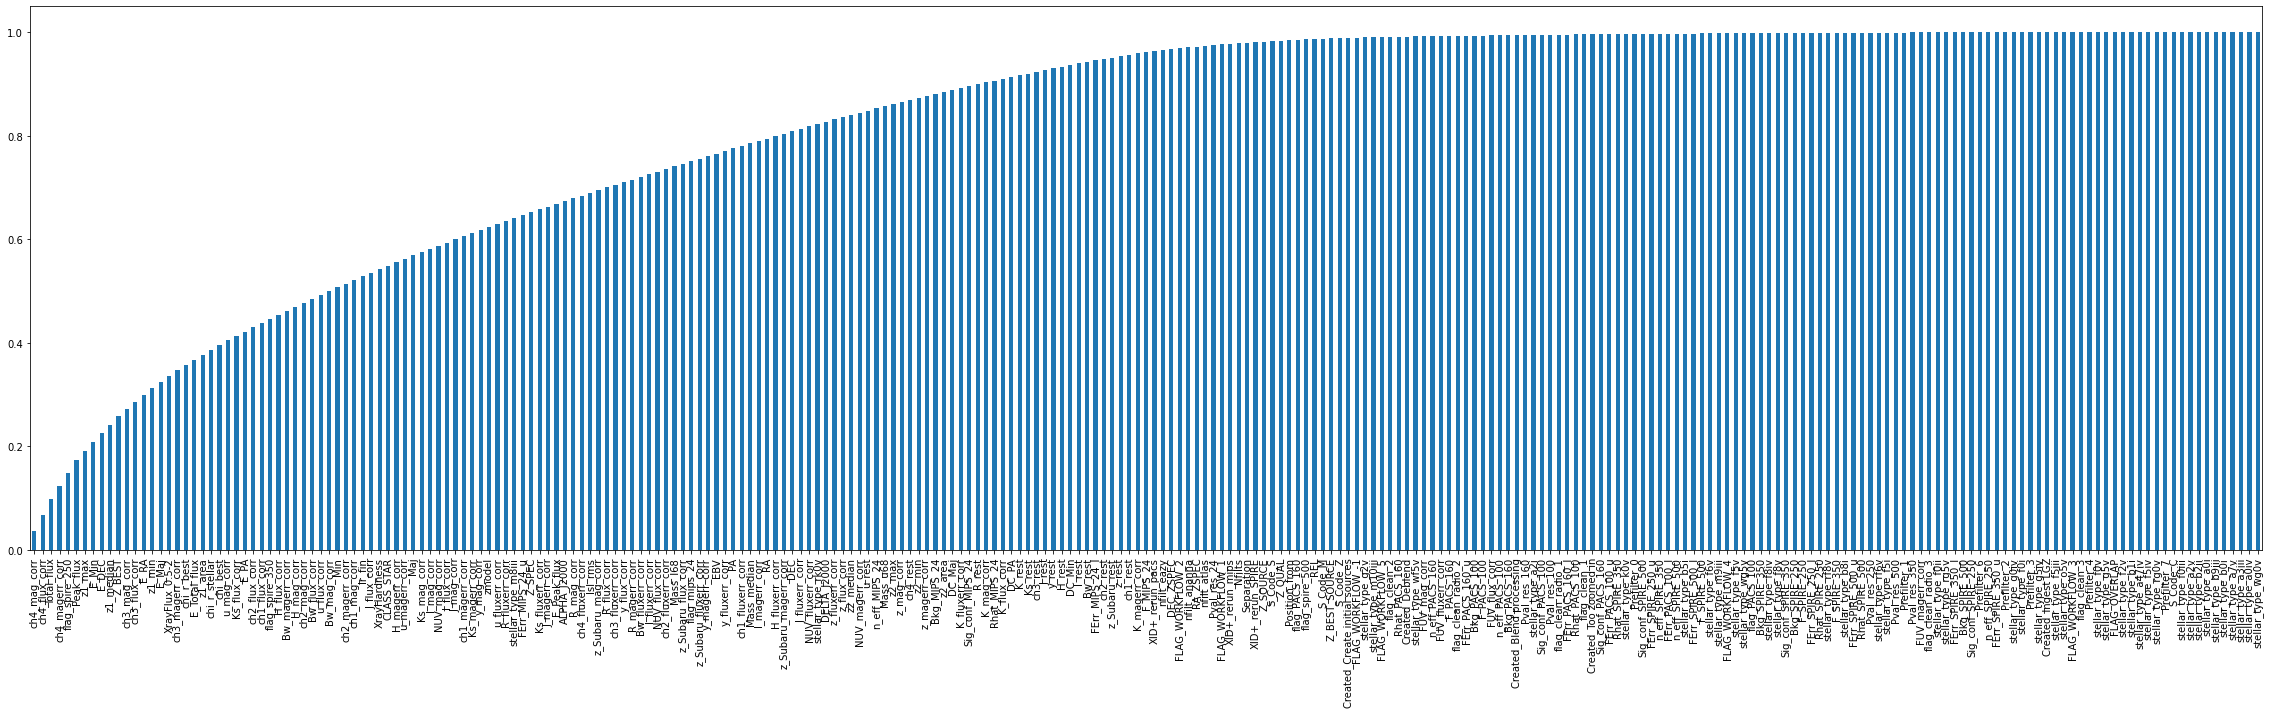

In [167]:
ax = random_forest_feature_importance['Cumulative'].plot(kind='bar', figsize=(40,10))
ax.set_xticklabels(random_forest_feature_importance.Feature)
plt.plot()

# XGboost

In [23]:
model = XGBClassifier(use_label_encoder=False, 
                      max_depth=8, 
                      reg_alpha=3, 
                      min_child_weight=1, 
                      reg_lambda=8,
                      gamma=0,
                     eta=0.3, 
                     n_estimators=1000)
bst = model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_test, y_test)], verbose=True,
         sample_weight=class_weight_all)

C:\Users\jespe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.13093
[1]	validation_0-mlogloss:0.96919
[2]	validation_0-mlogloss:0.85963
[3]	validation_0-mlogloss:0.78442
[4]	validation_0-mlogloss:0.71998
[5]	validation_0-mlogloss:0.67295
[6]	validation_0-mlogloss:0.63691
[7]	validation_0-mlogloss:0.60777
[8]	validation_0-mlogloss:0.58233
[9]	validation_0-mlogloss:0.56088
[10]	validation_0-mlogloss:0.54442
[11]	validation_0-mlogloss:0.52770
[12]	validation_0-mlogloss:0.51371
[13]	validation_0-mlogloss:0.50037
[14]	validation_0-mlogloss:0.49051
[15]	validation_0-mlogloss:0.48160
[16]	validation_0-mlogloss:0.47249
[17]	validation_0-mlogloss:0.46618
[18]	validation_0-mlogloss:0.46017
[19]	validation_0-mlogloss:0.45330
[20]	validation_0-mlogloss:0.44746
[21]	validation_0-mlogloss:0.44205
[22]	validation_0-mlogloss:0.43758
[23]	validation_0-mlogloss:0.43254
[24]	validation_0-mlogloss:0.42768
[25]	validation_0-mlogloss:0.42268
[26]	validation_0-mlogloss:0.41814
[27]	validation_0-mlogloss:0.41357
[28]	validation_0-mlogloss:0.4

In [24]:
# Training accuracy
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.9950    1.0000    0.9975      2602
quasar-like radio AGN / high-excitation radio galaxy     0.9810    1.0000    0.9904       310
                                     radio-quiet AGN     0.9889    1.0000    0.9944      1520
                                 star-forming galaxy     1.0000    0.9963    0.9982      9751

                                            accuracy                         0.9975     14183
                                           macro avg     0.9912    0.9991    0.9951     14183
                                        weighted avg     0.9975    0.9975    0.9975     14183



In [25]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.7906    0.8136    0.8019       617
quasar-like radio AGN / high-excitation radio galaxy     0.5893    0.4074    0.4818        81
                                     radio-quiet AGN     0.6878    0.7306    0.7085       386
                                 star-forming galaxy     0.9162    0.9098    0.9130      2462

                                            accuracy                         0.8621      3546
                                           macro avg     0.7459    0.7154    0.7263      3546
                                        weighted avg     0.8620    0.8621    0.8616      3546



[]

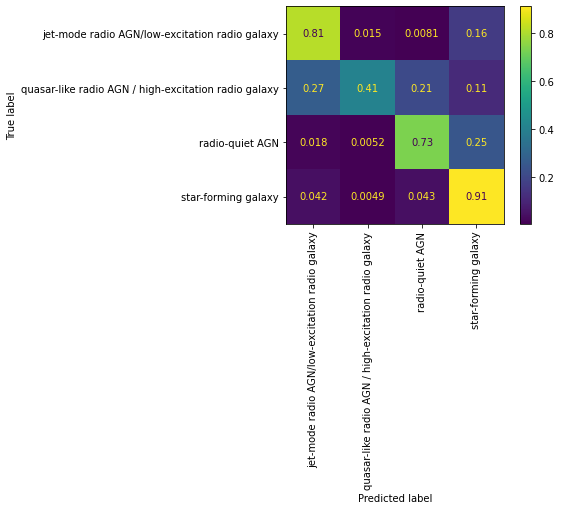

In [26]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()

# LightBM

In [27]:
param = {'num_class': 4, 
         'objective': "multiclass",  
         "max_depth": 8, 
         "num_leaves": 32, 
        "n_estimators": 1000,
        "class_weight": "balanced",
        "min_child_samples": 10,
        "reg_alpha": 1,
        "reg_lambda": 2,}

In [28]:
lightbm = lgb.LGBMClassifier(**param)
lightbm.fit(X_train, y_train, 
            callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation()], 
            eval_set=[(X_test, y_test)])

[1]	valid_0's multi_logloss: 1.25774
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 1.15603
[3]	valid_0's multi_logloss: 1.07414
[4]	valid_0's multi_logloss: 1.00676
[5]	valid_0's multi_logloss: 0.948277
[6]	valid_0's multi_logloss: 0.900055
[7]	valid_0's multi_logloss: 0.859777
[8]	valid_0's multi_logloss: 0.823371
[9]	valid_0's multi_logloss: 0.790597
[10]	valid_0's multi_logloss: 0.761647
[11]	valid_0's multi_logloss: 0.735242
[12]	valid_0's multi_logloss: 0.711548
[13]	valid_0's multi_logloss: 0.691323
[14]	valid_0's multi_logloss: 0.671837
[15]	valid_0's multi_logloss: 0.655441
[16]	valid_0's multi_logloss: 0.641061
[17]	valid_0's multi_logloss: 0.628279
[18]	valid_0's multi_logloss: 0.616103
[19]	valid_0's multi_logloss: 0.604502
[20]	valid_0's multi_logloss: 0.593703
[21]	valid_0's multi_logloss: 0.584248
[22]	valid_0's multi_logloss: 0.575035
[23]	valid_0's multi_logloss: 0.567519
[24]	valid_0's multi_logloss: 0.559402
[25]	valid_0's m

[209]	valid_0's multi_logloss: 0.354658
[210]	valid_0's multi_logloss: 0.354525
Early stopping, best iteration is:
[190]	valid_0's multi_logloss: 0.353935


LGBMClassifier(class_weight='balanced', max_depth=8, min_child_samples=10,
               n_estimators=1000, num_class=4, num_leaves=32,
               objective='multiclass', reg_alpha=1, reg_lambda=2)

In [29]:
# Training accuracy
y_pred = lightbm.predict(X_train)
print(classification_report(y_train, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.9797    1.0000    0.9897      2602
quasar-like radio AGN / high-excitation radio galaxy     0.9936    1.0000    0.9968       310
                                     radio-quiet AGN     0.9590    1.0000    0.9791      1520
                                 star-forming galaxy     1.0000    0.9876    0.9938      9751

                                            accuracy                         0.9915     14183
                                           macro avg     0.9831    0.9969    0.9898     14183
                                        weighted avg     0.9917    0.9915    0.9915     14183



In [30]:
y_pred = lightbm.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.7734    0.8185    0.7953       617
quasar-like radio AGN / high-excitation radio galaxy     0.6875    0.4074    0.5116        81
                                     radio-quiet AGN     0.6699    0.7254    0.6965       386
                                 star-forming galaxy     0.9155    0.9025    0.9090      2462

                                            accuracy                         0.8573      3546
                                           macro avg     0.7616    0.7134    0.7281      3546
                                        weighted avg     0.8588    0.8573    0.8570      3546



[]

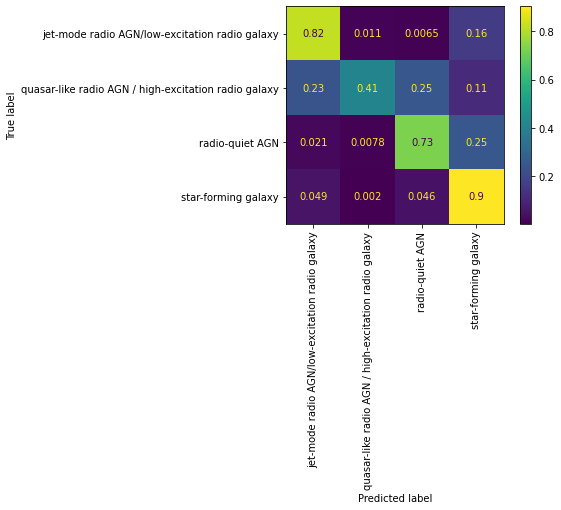

In [31]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()

## Hyperparameters

In [658]:
# Metrics for hyperparameter tuning
metrics = {"Accuracy": "accuracy",
          "Balanced accuracy": "balanced_accuracy",
          "F1 score": "f1_weighted"}

In [659]:
# Parameter space
parameters = { 
         "max_depth": [7,8,9], 
         "num_leaves": [16,32,64], 
        "min_child_samples": [1,5,10,15],
        "reg_alpha": [1,2,5],
        "reg_lambda": [1,2,5]}

In [660]:
lightbm = lgb.LGBMClassifier(num_class=4, objective="multiclass",  n_estimators=1000, class_weight="balanced")

In [661]:
clf = GridSearchCV(estimator=lightbm, 
                   param_grid=parameters,
                  scoring=metrics,
                  refit="Accuracy",
                  return_train_score=True,
                  n_jobs=-1,
                  cv=2,
                  verbose=4)

clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], callbacks=[lgb.early_stopping(stopping_rounds=20)

Fitting 2 folds for each of 324 candidates, totalling 648 fits


GridSearchCV(cv=2,
             estimator=LGBMClassifier(class_weight='balanced',
                                      n_estimators=1000, num_class=4,
                                      objective='multiclass'),
             n_jobs=-1,
             param_grid={'max_depth': [7, 8, 9],
                         'min_child_samples': [1, 5, 10, 15],
                         'num_leaves': [16, 32, 64], 'reg_alpha': [1, 2, 5],
                         'reg_lambda': [1, 2, 5]},
             refit='Accuracy', return_train_score=True,
             scoring={'Accuracy': 'accuracy',
                      'Balanced accuracy': 'balanced_accuracy',
                      'F1 score': 'f1_weighted'},
             verbose=4)

In [665]:
clf.best_params_, clf.best_score_

({'max_depth': 7,
  'min_child_samples': 5,
  'num_leaves': 32,
  'reg_alpha': 1,
  'reg_lambda': 2},
 0.8615947421256325)

In [250]:
clf = lgb.LGBMClassifier(num_class=4, 
                             objective="multiclass",  
                             n_estimators=200, 
                             class_weight="balanced",
                             max_depth=7, 
                             num_leaves=32, 
                             min_child_samples=5,
                             reg_alpha=1,
                             reg_lambda=2)
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], callbacks=[lgb.early_stopping(stopping_rounds=20)])

Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[190]	valid_0's multi_logloss: 0.358192


LGBMClassifier(class_weight='balanced', max_depth=7, min_child_samples=5,
               n_estimators=200, num_class=4, num_leaves=32,
               objective='multiclass', reg_alpha=1, reg_lambda=2)

In [251]:
# Training accuracy
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.9738    1.0000    0.9867      2602
quasar-like radio AGN / high-excitation radio galaxy     0.9936    1.0000    0.9968       310
                                     radio-quiet AGN     0.9512    1.0000    0.9750      1520
                                 star-forming galaxy     1.0000    0.9846    0.9922      9751

                                            accuracy                         0.9894     14183
                                           macro avg     0.9796    0.9962    0.9877     14183
                                        weighted avg     0.9898    0.9894    0.9895     14183



In [252]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.7641    0.8136    0.7881       617
quasar-like radio AGN / high-excitation radio galaxy     0.6250    0.3704    0.4651        81
                                     radio-quiet AGN     0.6738    0.7332    0.7022       386
                                 star-forming galaxy     0.9162    0.9009    0.9085      2462

                                            accuracy                         0.8553      3546
                                           macro avg     0.7448    0.7045    0.7160      3546
                                        weighted avg     0.8567    0.8553    0.8549      3546



[]

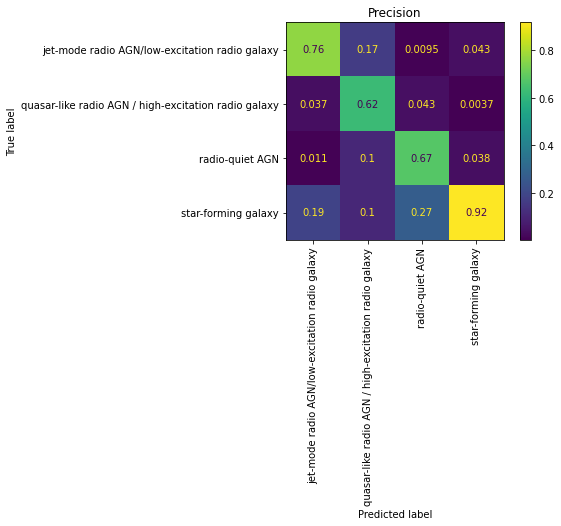

In [262]:
cm = confusion_matrix(y_test, y_pred, normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.title("Precision")
plt.plot()

[]

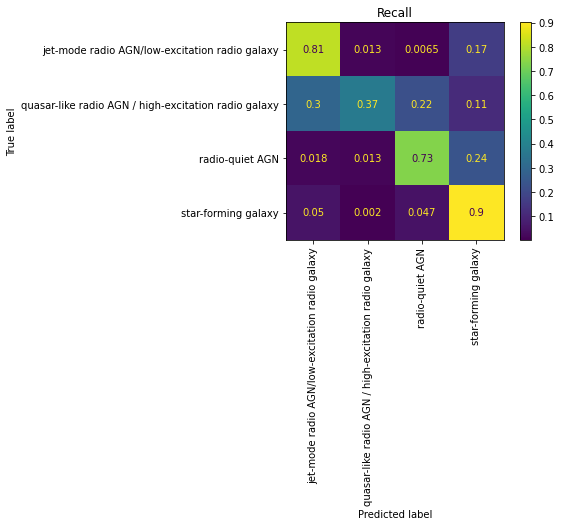

In [263]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.title("Recall")
plt.plot()

# CV Best Hyperparameters

In [33]:
lightbm = lgb.LGBMClassifier(num_class=4, 
                             objective="multiclass",  
                             n_estimators=200, 
                             class_weight="balanced",
                             max_depth=7, 
                             num_leaves=32, 
                             min_child_samples=5,
                             reg_alpha=1,
                             reg_lambda=2)

In [46]:
cv_score = cross_val_score(lightbm, X_train, y_train, cv=32, n_jobs=-1, scoring="accuracy")

In [47]:
print(round(np.mean(cv_score), 5), "±", round(np.std(cv_score), 5))

0.86914 ± 0.01338


# Feature importance

In [49]:
lightbm = lgb.LGBMClassifier(num_class=4, 
                             objective="multiclass",  
                             n_estimators=1000, 
                             class_weight="balanced",
                             max_depth=7, 
                             num_leaves=32, 
                             min_child_samples=5,
                             reg_alpha=1,
                             reg_lambda=2)

In [52]:
lightbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], callbacks=[lgb.early_stopping(stopping_rounds=20)])

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[190]	valid_0's multi_logloss: 0.358192


LGBMClassifier(class_weight='balanced', max_depth=7, min_child_samples=5,
               n_estimators=1000, num_class=4, num_leaves=32,
               objective='multiclass', reg_alpha=1, reg_lambda=2)

In [181]:
lightbm_feature_importance = pd.DataFrame(
    np.array([all_features, 
              lightbm.feature_importances_/sum(lightbm.feature_importances_)]).T,
                                               columns=['Feature', 'Importance'])
lightbm_feature_importance = lightbm_feature_importance.sort_values(by=['Importance'], ascending=False)

[]

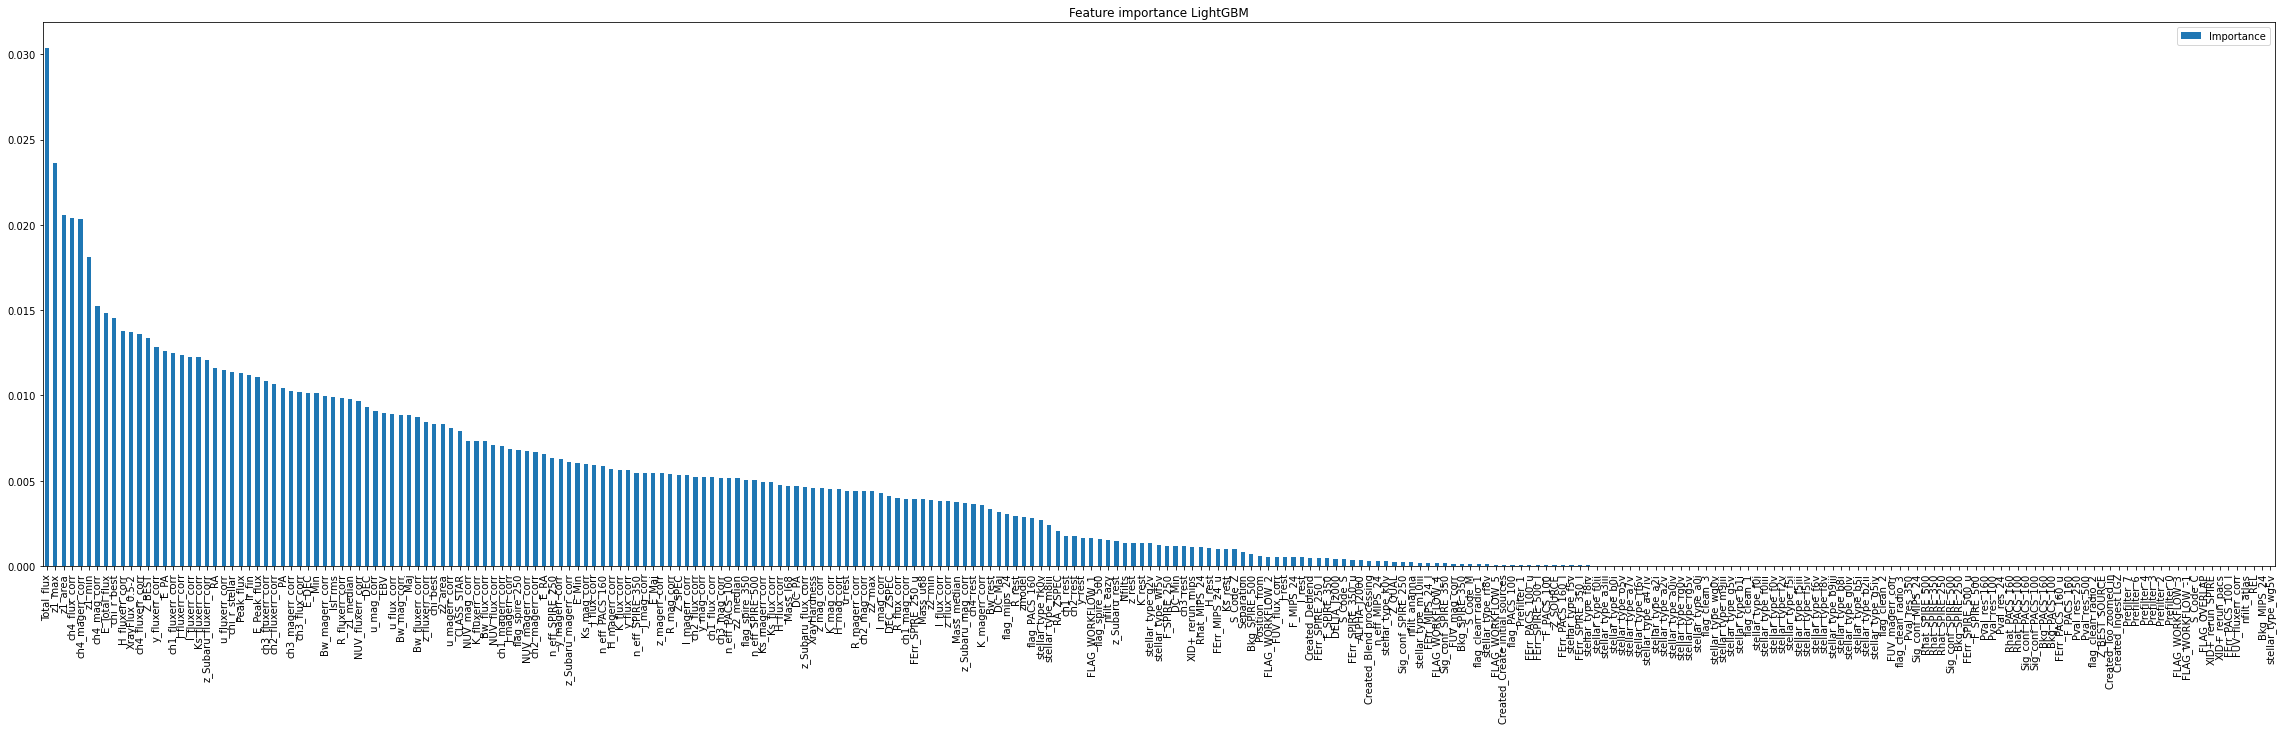

In [182]:
ax = lightbm_feature_importance.plot(kind='bar', figsize=(40,10))
ax.set_xticklabels(lightbm_feature_importance.Feature)
plt.title("Feature importance LightGBM")
plt.plot()

In [183]:
lightbm_feature_importance["Cumulative"] = np.cumsum(lightbm_feature_importance["Importance"])
lightbm_feature_importance

,Feature,Importance,Cumulative
4,Total_flux,0.030353,0.030353
142,z1_max,0.023646,0.053999
143,z1_area,0.020547,0.074546
79,ch4_flux_corr,0.020419,0.094965
81,ch4_magerr_corr,0.020335,0.1153
...,...,...,...
177,FUV_fluxerr_corr,0.0,1.0
149,nfilt_atlas,0.0,1.0
139,REL,0.0,1.0
87,Bkg_MIPS_24,0.0,1.0


[]

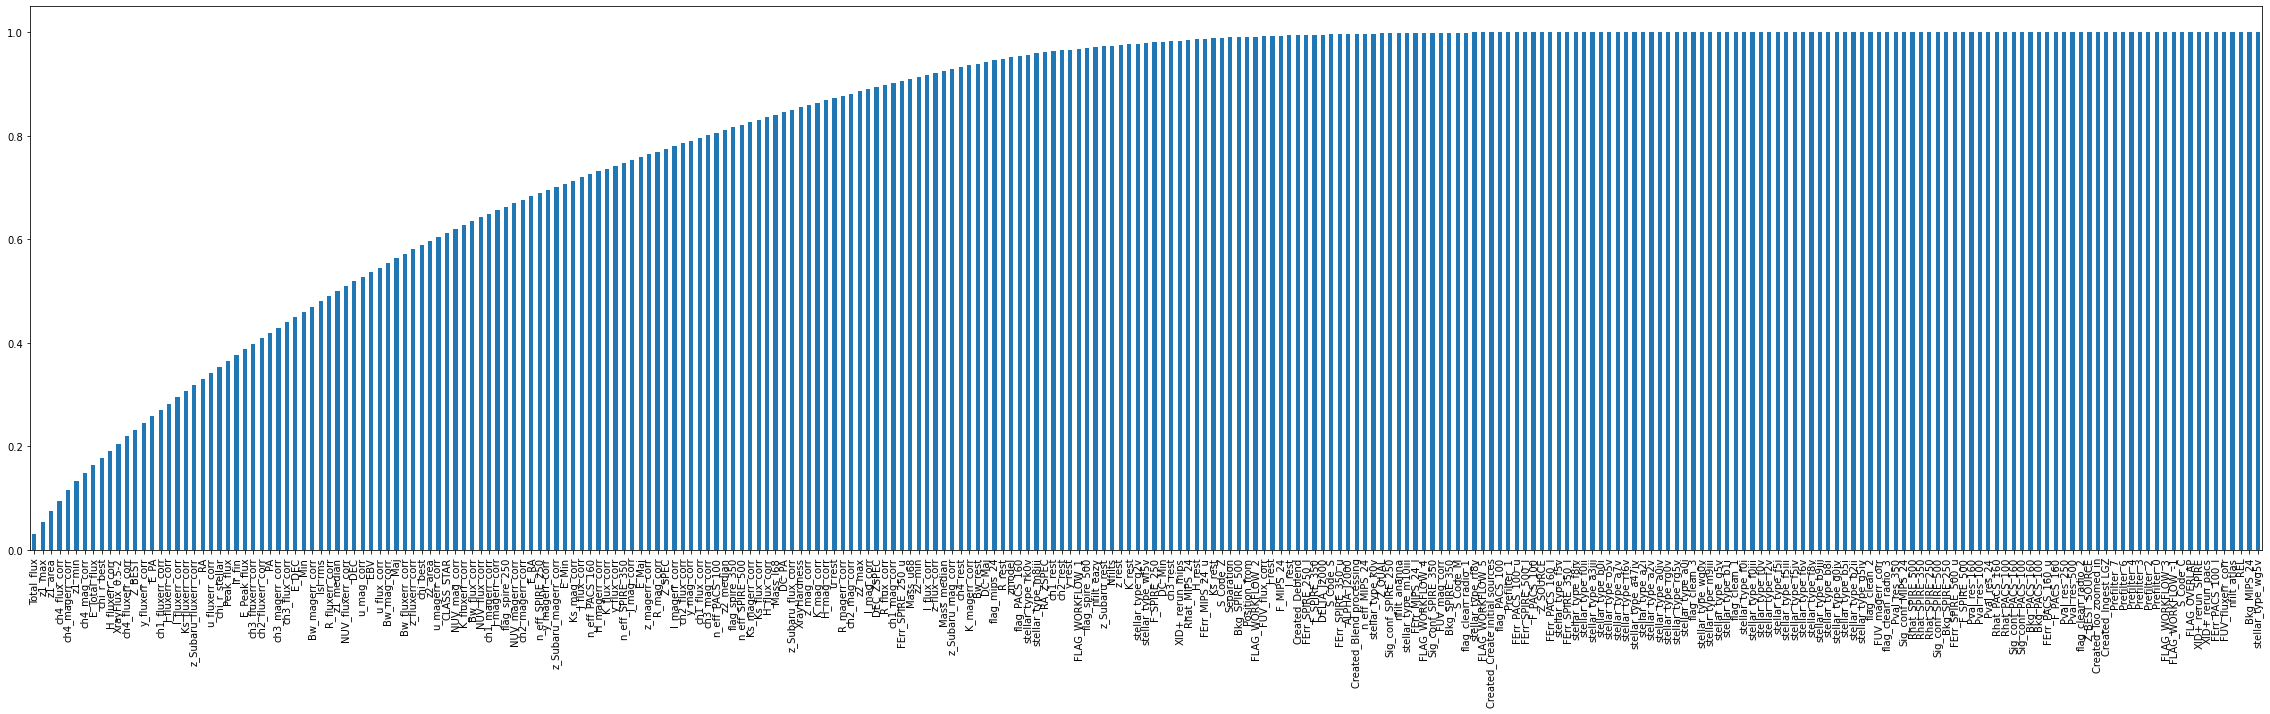

In [184]:
ax = lightbm_feature_importance['Cumulative'].plot(kind='bar', figsize=(40,10))
ax.set_xticklabels(lightbm_feature_importance.Feature)
plt.plot()

In [188]:
lightbm_feature_importance[0:80].index

Int64Index([  4, 142, 143,  79,  81, 141, 183,   5, 151, 180, 174,  80, 132,
             51,  13,  69,  55,  39,  65,  47,   0,  27, 152,   6,  18,   7,
             76,  73,  10,  78,  75,   3,   9,  33,  17,  35, 140,  23,   1,
             28,  21,  26,  32,   8,  31,  43, 154, 147,  29,  83,  24,  62,
             30,  22,  71,  57, 187,  25, 182,   2, 126,  53,  49,  12,  66,
             54, 105,  60,  61,  50, 128,  56,  11,  45,  36, 134,  41,  72,
             52,  68],
           dtype='int64')

In [195]:
some_features = lightbm_feature_importance[0:80].index

In [198]:
lightbm = lgb.LGBMClassifier(num_class=4, 
                             objective="multiclass",  
                             n_estimators=200, 
                             class_weight="balanced",
                             max_depth=7, 
                             num_leaves=32, 
                             min_child_samples=5,
                             reg_alpha=1,
                             reg_lambda=2)

In [211]:
less_features = pd.DataFrame(columns=["Number of Features", "Accuracy", "std"])

In [231]:
less_features = pd.DataFrame(columns=["Number of Features", "Accuracy", "std"])
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,125,150,175,200]:
    some_features = lightbm_feature_importance[0:i].index
    cv_score = cross_val_score(lightbm, X_train[:,some_features], y_train, cv=8, n_jobs=-1, scoring="accuracy")
    
    newdata = pd.DataFrame({"Number of Features": i, "Accuracy": np.mean(cv_score), "std": np.std(cv_score)}, index=[0])
    
    less_features = pd.concat([less_features, newdata], ignore_index=True)

In [232]:
less_features

,Number of Features,Accuracy,std
0,1,0.413593,0.010162
1,2,0.546287,0.012933
2,3,0.579145,0.011353
3,4,0.741169,0.007293
4,5,0.750899,0.007962
5,6,0.760559,0.01168
6,7,0.762532,0.010697
7,8,0.766339,0.007902
8,9,0.770147,0.005255
9,10,0.771628,0.005943


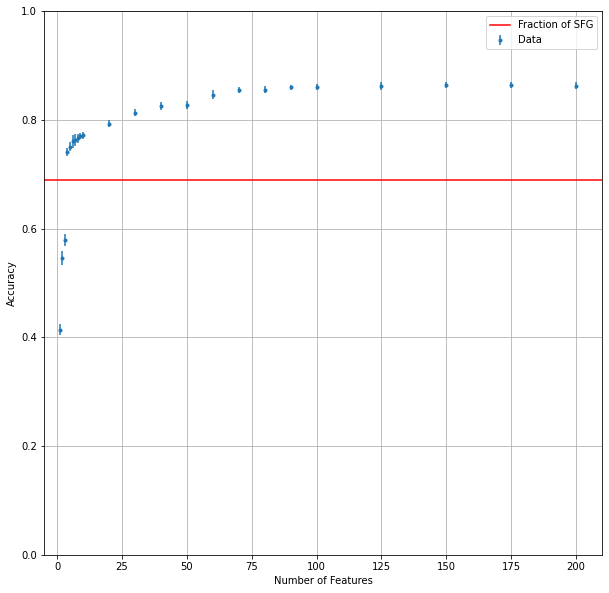

In [239]:
plt.figure(figsize=(10,10))
plt.errorbar(less_features["Number of Features"], less_features["Accuracy"], yerr=less_features["std"], label="Data",
             markersize =3, fmt="o")
plt.plot([-100, 220], [0.688871, 0.688871], c="red", label="Fraction of SFG")
plt.grid()
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.xlim(-5,210)
plt.ylim(0,1)
plt.legend()

# SVM

In [319]:
clf = svm.SVC(kernel="linear", class_weight="balanced")
clf.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear')

In [320]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.6693    0.7857    0.7229       644
quasar-like radio AGN / high-excitation radio galaxy     0.2186    0.5732    0.3165        82
                                     radio-quiet AGN     0.5578    0.7397    0.6360       411
                                 star-forming galaxy     0.9389    0.7912    0.8588      2409

                                            accuracy                         0.7792      3546
                                           macro avg     0.5962    0.7224    0.6335      3546
                                        weighted avg     0.8291    0.7792    0.7957      3546



[]

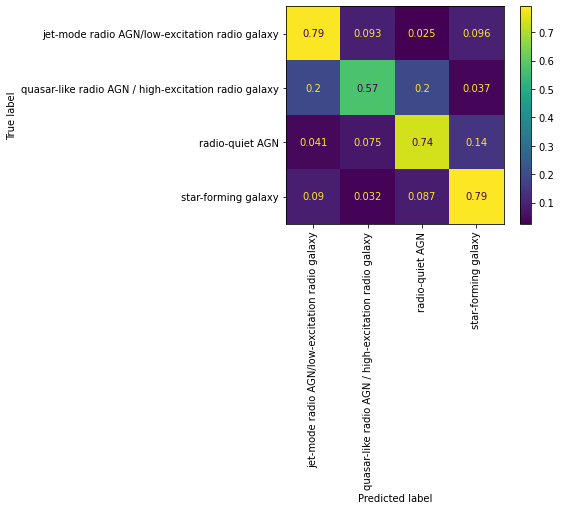

In [321]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()